In [1]:
%env PYTORCH_ENABLE_MPS_FALLBACK=1
from fastbook import *
from fastai.vision.widgets import *

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [2]:
flower_types = 'crimson','dandelion','rose'
path=Path('flowers')

In [3]:
if not path.exists():
    path.mkdir()
for o in flower_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} flower', max_images=50)
    download_images(dest, urls=results)

In [22]:
fns = get_image_files(path)
fns

(#578) [Path('flowers/crimson/092b8382-5a09-4451-8659-000ec194427f.jpg'),Path('flowers/crimson/18b1a4b3-bbf1-46a3-85b1-75a30872592a.jpeg'),Path('flowers/crimson/e23fe8b7-6f71-40a2-b980-7ee97f1164dc.jpg'),Path('flowers/crimson/f1edc513-4cad-45f0-8055-9372ce1d161c.jpg'),Path('flowers/crimson/144d44e0-90c8-4515-a9d1-f437eef76034.jpg'),Path('flowers/crimson/d2b10999-81dd-4700-8a95-40c72c126fd9.jpg'),Path('flowers/crimson/d00a6013-a750-4090-acea-e0f6640893f6.jpg'),Path('flowers/crimson/f0008bd7-32be-44a0-89d1-36889b9c457a.jpg'),Path('flowers/crimson/5ef163ce-04db-41c9-89e0-0c4e8beaece4.jpg'),Path('flowers/crimson/88a00217-4c7e-4fed-9e41-ea8ba1841739.jpg')...]

In [23]:
failed = verify_images(fns)
failed
failed.map(Path.unlink)

(#0) []

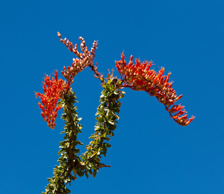

In [24]:
im = Image.open(fns[0])
im.to_thumb(224)

In [25]:
flowers = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=78),
    get_y=parent_label,
    item_tfms=Resize(224)
    )

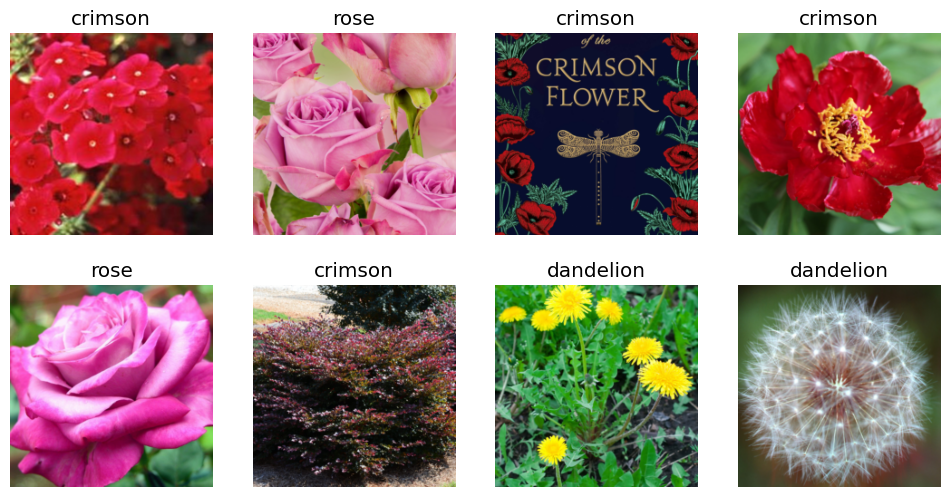

In [26]:
dls = flowers.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

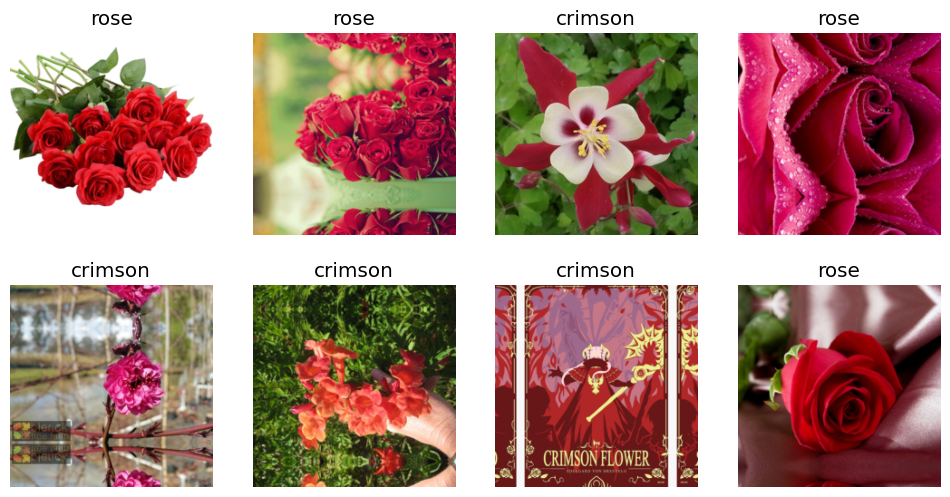

In [9]:
""" flowers = flowers.new(item_tfms=Resize(224, ResizeMethod.Pad))
dls = flowers.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2) """

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/_tensor.py:1386: UserWarning: The operator 'aten::_linalg_solve_ex.result' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  ret = func(*args, **kwargs)


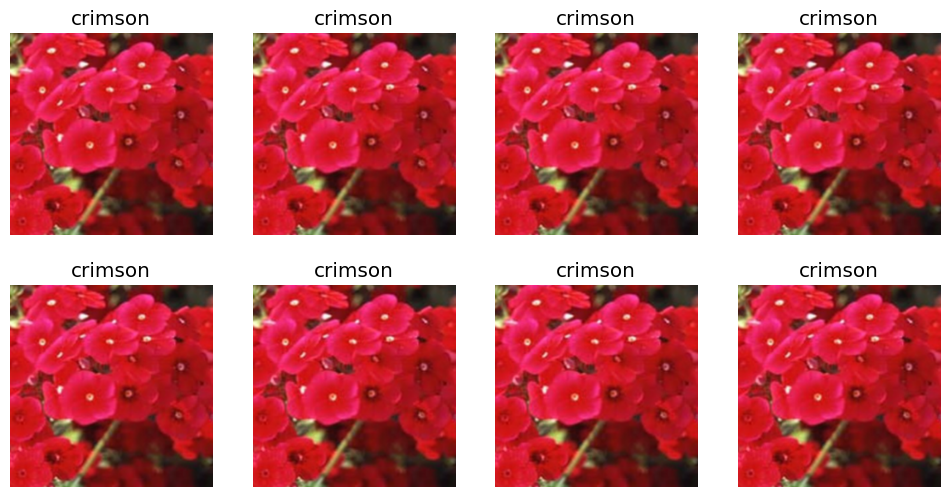

In [27]:
flowers = flowers.new(item_tfms=RandomResizedCrop(224),
                      batch_tfms=aug_transforms(mult=2))
dls = flowers.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2, unique=True)

In [28]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

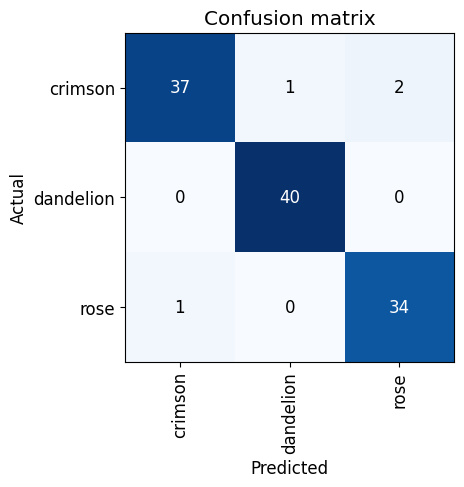

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

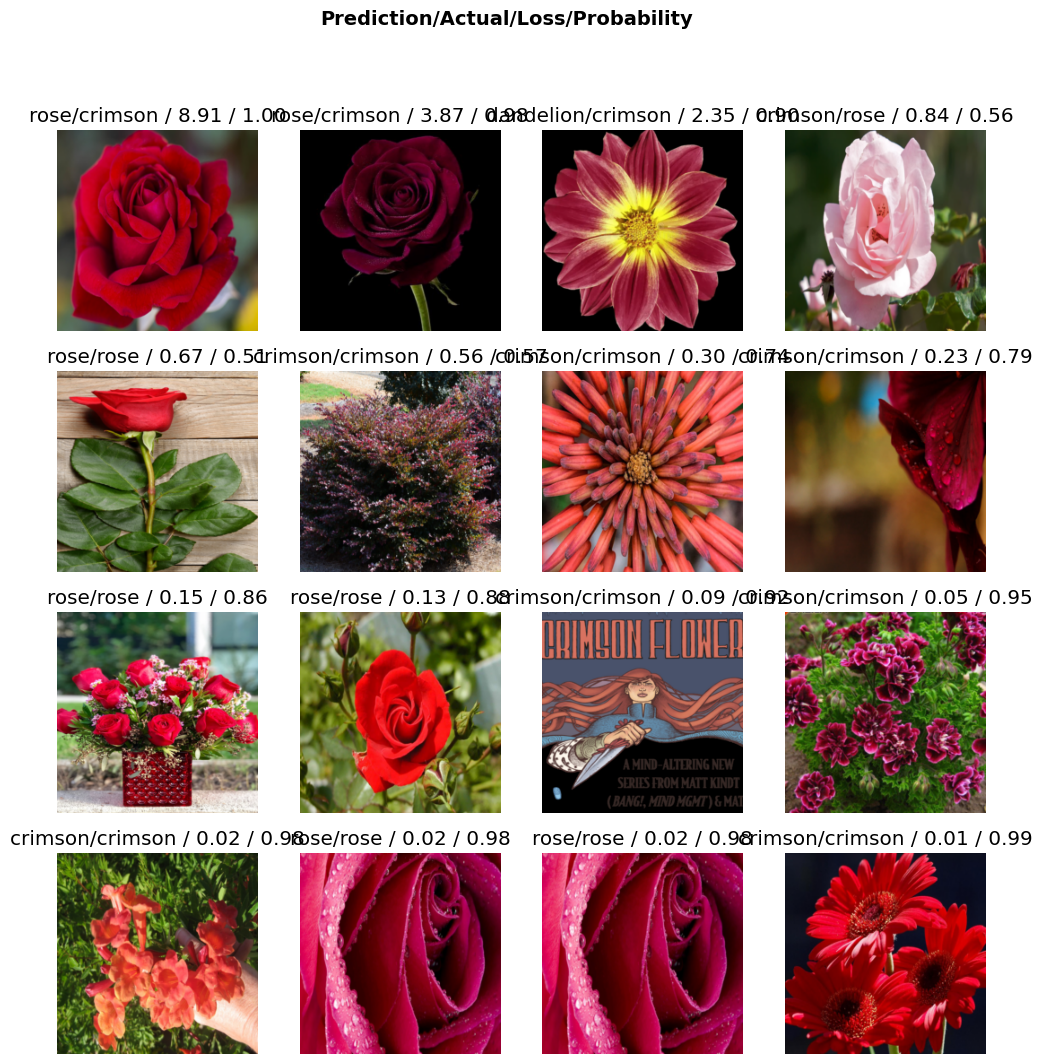

In [30]:
interp.plot_top_losses(16, nrows=4)

In [31]:
cleaner = ImageClassifierCleaner(learn)

In [32]:
cleaner

In [33]:
for idx in cleaner.delete(): 
    cleaner.fns[idx].unlink()

for idx, cat in cleaner.change(): 
    shutil.mov(str(cleaner.fns[idx]), path/cat)

TypeError: ClassificationInterpretation.__init__() missing 2 required positional arguments: 'dl' and 'losses'

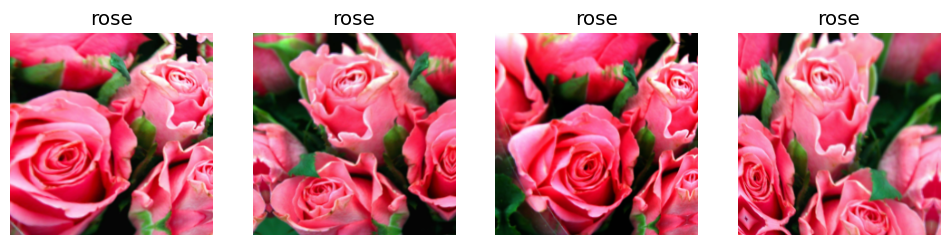

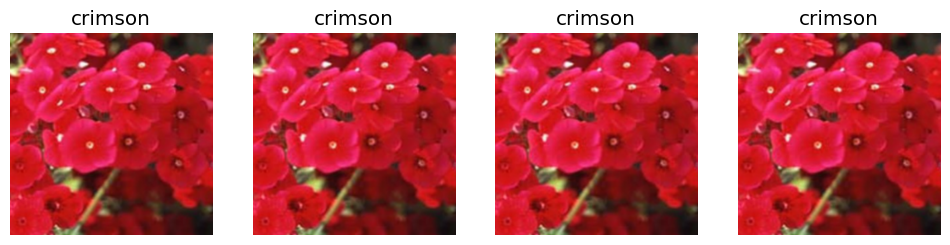

In [34]:
fns = get_image_files(path)
fns

failed = verify_images(fns)
failed

failed.map(Path.unlink)

flowers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=78),
    get_y=parent_label,
    item_tfms=Resize(128)
)

dls = flowers.dataloaders(path)
flowers = flowers.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls=flowers.dataloaders(path)

dls.train.show_batch(max_n=4,nrows=1, unique=True)
dls.valid.show_batch(max_n=4,nrows=1, unique=True)

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

interp = ClassificationInterpretation(learn)
interp.plot_confusion_matrix()

interp.plot_top_losses(16, nrows=4)

In [35]:
cleaner = ImageClassifierCleaner(learn)

In [36]:
cleaner

In [37]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.mov(str(cleaner.fns[idx]), path/cat)

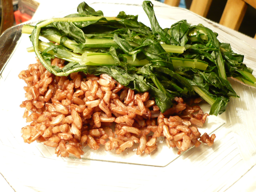

In [51]:
im = Image.open('Plate.jpg')
im.to_thumb(256)
#learn.predict('plate.jpg')

In [39]:
learn.dls.vocab

['crimson', 'dandelion', 'rose']

In [ ]:
btn_up = widgets.FileUpload()
btn_up

In [52]:
btn_up = SimpleNamespace(data = ['bombus.jpg'])
img = PILImage.create(btn_up.data[-1])

In [53]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

pred, pred_idx, probs = learn.predict(img)


In [59]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: dandelion; Probability: 0.9902')

In [60]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [62]:
def on_click_classify(change):
    img = PILImage.create(btn_up.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [63]:
btn_up = widgets.FileUpload()
btn_up

FileUpload(value=(), description='Upload')

In [64]:
VBox([widgets.Label('Select your bear!'), 
      btn_up, btn_run, out_pl, lbl_pred])